# Customer Churn Prediction

## Problem Statement
Customer churn is a critical challenge for businesses, especially in competitive industries like telecommunications, banking, and subscription services. Predicting which customers are likely to leave enables businesses to:
- Implement proactive retention strategies
- Reduce customer acquisition costs
- Improve overall customer lifetime value

The goal of this project is to build a machine learning model that predicts whether a customer will churn (leave) based on their historical behavior and demographic information.

## Dataset Description
The dataset contains customer information and their churn status with the following characteristics:
### Feature Categories

**Demographic Features:**
- State, Area Code, Phone

**Service Features:**
- Int'l Plan, VMail Plan

**Call Usage by Time Period:**
- Day: Mins, Calls, Charge
- Eve: Mins, Calls, Charge
- Night: Mins, Calls, Charge
- Intl: Mins, Calls, Charge

**Service Interactions:**
- CustServ Calls, VMail Message, Account Length

**Target Variable:**
- Churn? (Binary: True/False)
  
**Source**: Customer records from a telecommunications or financial services company

In [74]:
# ================================================================================
# IMPORT NECESSARY LIBRARIES FOR CUSTOMER CHURN PREDICTION PROJECT
# ================================================================================

import pandas as pd           # Data manipulation and analysis
import numpy as np            # Numerical computing and array operations
import matplotlib.pyplot as plt    # Basic plotting library
import seaborn as sns             # Statistical data visualization

from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split  # Split data into train/test
from sklearn.model_selection import cross_val_score   # Cross-validation scoring
from sklearn.model_selection import GridSearchCV       # Hyperparameter tuning

# Classification Models
from sklearn.linear_model import LogisticRegression   # Logistic Regression
from sklearn.ensemble import RandomForestClassifier   # Random Forest
from xgboost import XGBClassifier                     # XGBoost Classifier

# Evaluation metrics
from sklearn.metrics import (
    accuracy_score,           # Overall accuracy
    precision_score,          # Precision (True Positives / Predicted Positives)
    recall_score,             # Recall (True Positives / Actual Positives)
    f1_score,                 # F1-score (Harmonic mean of precision and recall)
    confusion_matrix,         # Confusion matrix
)
from sklearn import metrics
pd.set_option('display.max_columns', None)      # Display all columns
pd.set_option('display.max_rows', None)         # Display all rows
pd.set_option('display.width', None)            # No width limit
pd.set_option('display.max_colwidth', None)     # No column width limit

import warnings
warnings.filterwarnings('ignore')  # Suppress warnings for cleaner output

In [2]:
# Load the dataset
df = pd.read_csv('data/churn.csv')

print(f"Dataset loaded successfully!")
print(f"Shape: {df.shape[0]} rows × {df.shape[1]} columns")


Dataset loaded successfully!
Shape: 3333 rows × 21 columns


In [3]:
# Display few rows of dataset
df.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


## Get the overview of data

In [4]:
# Get the summary of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   State           3333 non-null   object 
 1   Account Length  3333 non-null   int64  
 2   Area Code       3333 non-null   int64  
 3   Phone           3333 non-null   object 
 4   Int'l Plan      3333 non-null   object 
 5   VMail Plan      3333 non-null   object 
 6   VMail Message   3333 non-null   int64  
 7   Day Mins        3333 non-null   float64
 8   Day Calls       3333 non-null   int64  
 9   Day Charge      3333 non-null   float64
 10  Eve Mins        3333 non-null   float64
 11  Eve Calls       3333 non-null   int64  
 12  Eve Charge      3333 non-null   float64
 13  Night Mins      3333 non-null   float64
 14  Night Calls     3333 non-null   int64  
 15  Night Charge    3333 non-null   float64
 16  Intl Mins       3333 non-null   float64
 17  Intl Calls      3333 non-null   i

In [5]:
# Exploring missing values
df.isnull().sum()

State             0
Account Length    0
Area Code         0
Phone             0
Int'l Plan        0
VMail Plan        0
VMail Message     0
Day Mins          0
Day Calls         0
Day Charge        0
Eve Mins          0
Eve Calls         0
Eve Charge        0
Night Mins        0
Night Calls       0
Night Charge      0
Intl Mins         0
Intl Calls        0
Intl Charge       0
CustServ Calls    0
Churn?            0
dtype: int64

In [6]:
# Exploring Duplicate value
df.duplicated().sum()

np.int64(0)

In [7]:
#Get the name of columns in dataset
df.columns

Index(['State', 'Account Length', 'Area Code', 'Phone', 'Int'l Plan',
       'VMail Plan', 'VMail Message', 'Day Mins', 'Day Calls', 'Day Charge',
       'Eve Mins', 'Eve Calls', 'Eve Charge', 'Night Mins', 'Night Calls',
       'Night Charge', 'Intl Mins', 'Intl Calls', 'Intl Charge',
       'CustServ Calls', 'Churn?'],
      dtype='object')

In [8]:
column_names = [col.replace(" ", "_") for col in df.columns]
df.columns = column_names

In [9]:
df.columns

Index(['State', 'Account_Length', 'Area_Code', 'Phone', 'Int'l_Plan',
       'VMail_Plan', 'VMail_Message', 'Day_Mins', 'Day_Calls', 'Day_Charge',
       'Eve_Mins', 'Eve_Calls', 'Eve_Charge', 'Night_Mins', 'Night_Calls',
       'Night_Charge', 'Intl_Mins', 'Intl_Calls', 'Intl_Charge',
       'CustServ_Calls', 'Churn?'],
      dtype='object')

In [10]:
# Get the statistical summary of dataset
df.describe(include= 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
State,3333,51,WV,106,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Account_Length,3333.0,NaN,NaN,NaN,101.064806,39.822106,1.0,74.0,101.0,127.0,243.0
Area_Code,3333.0,NaN,NaN,NaN,437.182418,42.37129,408.0,408.0,415.0,510.0,510.0
Phone,3333,3333,382-4657,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Int'l_Plan,3333,2,no,3010,NaN,NaN,NaN,NaN,NaN,NaN,NaN
VMail_Plan,3333,2,no,2411,NaN,NaN,NaN,NaN,NaN,NaN,NaN
VMail_Message,3333.0,NaN,NaN,NaN,8.09901,13.688365,0.0,0.0,0.0,20.0,51.0
Day_Mins,3333.0,NaN,NaN,NaN,179.775098,54.467389,0.0,143.7,179.4,216.4,350.8
Day_Calls,3333.0,NaN,NaN,NaN,100.435644,20.069084,0.0,87.0,101.0,114.0,165.0
Day_Charge,3333.0,NaN,NaN,NaN,30.562307,9.259435,0.0,24.43,30.5,36.79,59.64


## EXPLORATORY DATA ANALYSIS (EDA)
** To understand the data distribution and association.

In [11]:
import matplotlib.pyplot as plt

def plot_numeric_distribution(df, column):
    """
    Plots histogram and boxplot for a given numerical column in a DataFrame.

    Parameters:
        df (pd.DataFrame): The input DataFrame
        column (str): The name of the numeric column to plot
    """
    data = df[column].dropna()  # Handle missing values
    plt.figure(figsize=(12, 5))

    # Histogram
    plt.subplot(1, 2, 1)
    plt.hist(data, bins=20)
    plt.title(f"Histogram of {column}")
    plt.xlabel(column)
    plt.ylabel("Frequency")

    # Boxplot
    plt.subplot(1, 2, 2)
    plt.boxplot(data, vert=False)
    plt.title(f"Boxplot of {column}")
    plt.xlabel(column)

    plt.tight_layout()
    plt.show()


In [12]:
def plot_categorical_distribution(df, column):
    """
    Plots a barplot and pie chart for a given categorical column in a DataFrame.

    Parameters:
        df (pd.DataFrame): Input DataFrame
        column (str): Categorical column name
    """
    data = df[column].fillna("Missing")
    counts = data.value_counts()

    plt.figure(figsize=(12, 5))

    # Bar Plot
    plt.subplot(1, 2, 1)
    counts.plot(kind="bar")
    plt.title(f"Bar Plot of {column}")
    plt.xlabel(column)
    plt.ylabel("Count")

    # Pie Chart
    plt.subplot(1, 2, 2)
    counts.plot(kind="pie", autopct="%1.1f%%", startangle=90)
    plt.title(f"Pie Chart of {column}")
    plt.ylabel("")  # Remove default y-label

    plt.tight_layout()
    plt.show()


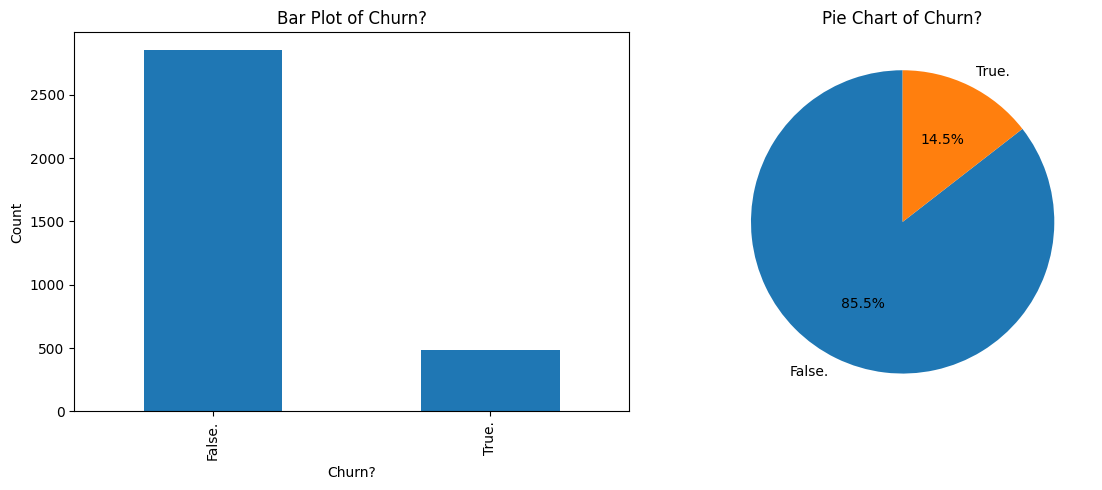

In [13]:
plot_categorical_distribution(df, 'Churn?')

We can clearly observed the data has a slight imbalance with respect to target variable.

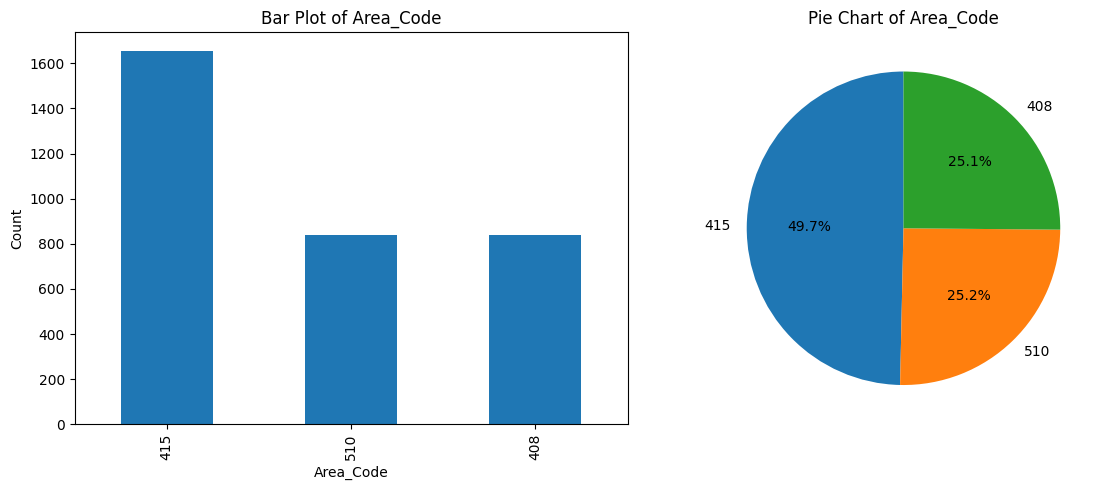

In [14]:
plot_categorical_distribution(df, 'Area_Code')

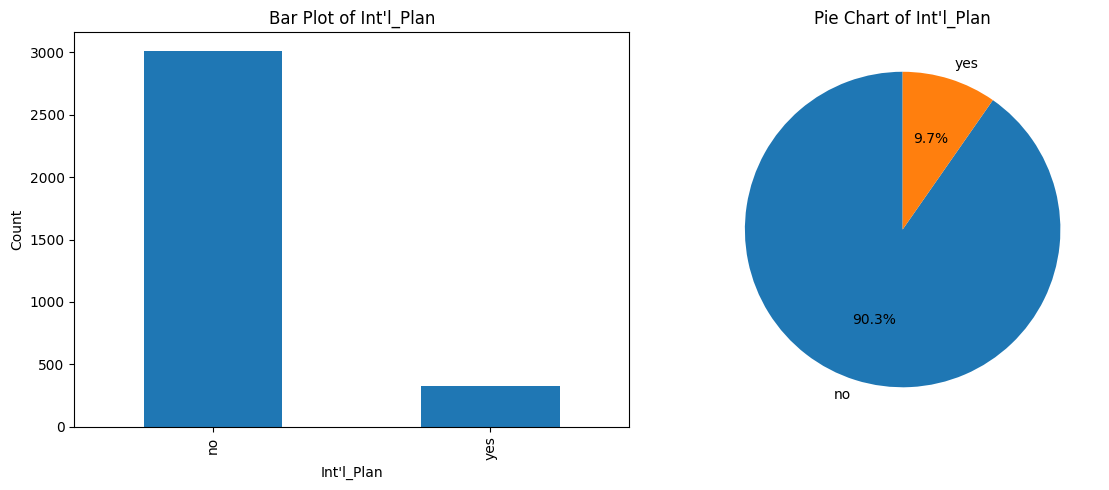

In [15]:
plot_categorical_distribution(df, "Int'l_Plan")

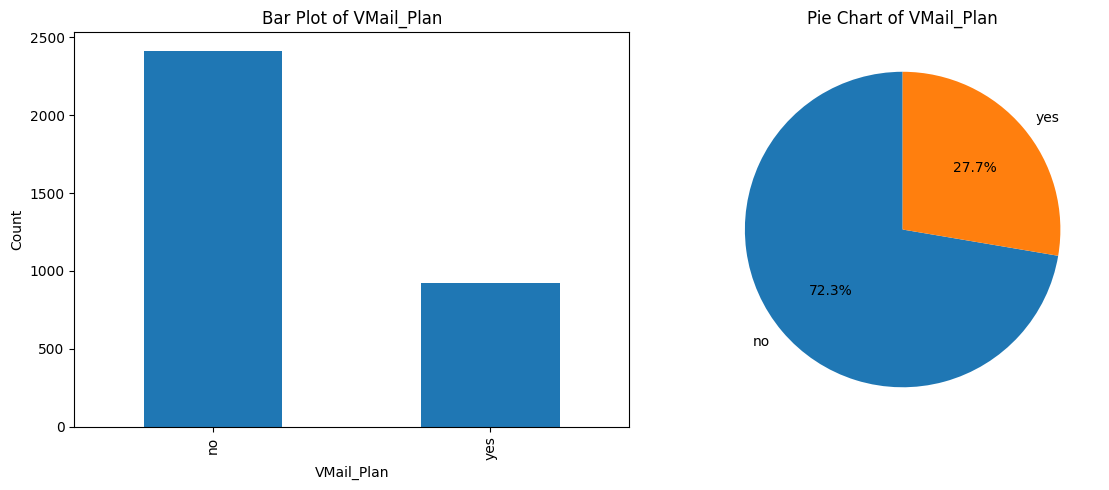

In [16]:
plot_categorical_distribution(df, 'VMail_Plan')

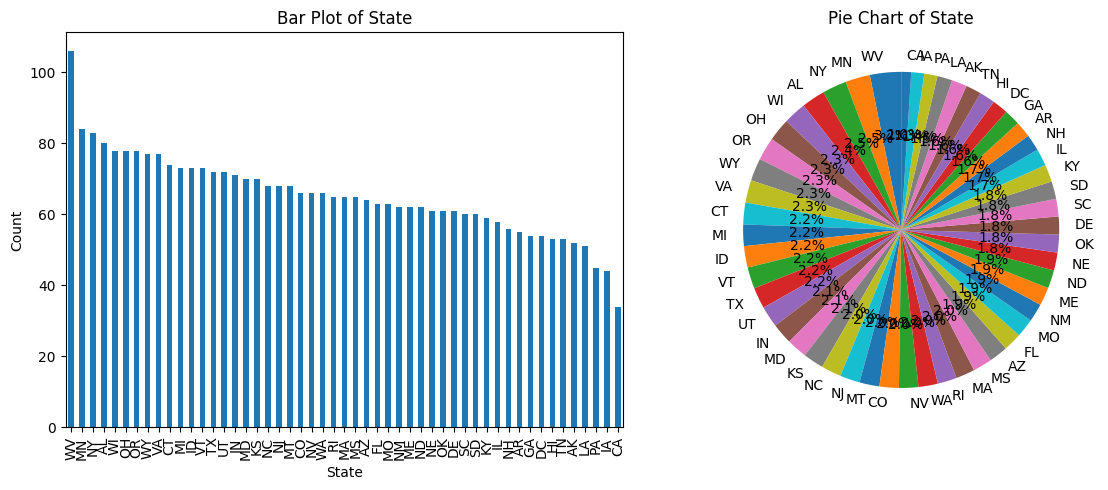

In [17]:
plot_categorical_distribution(df, 'State')

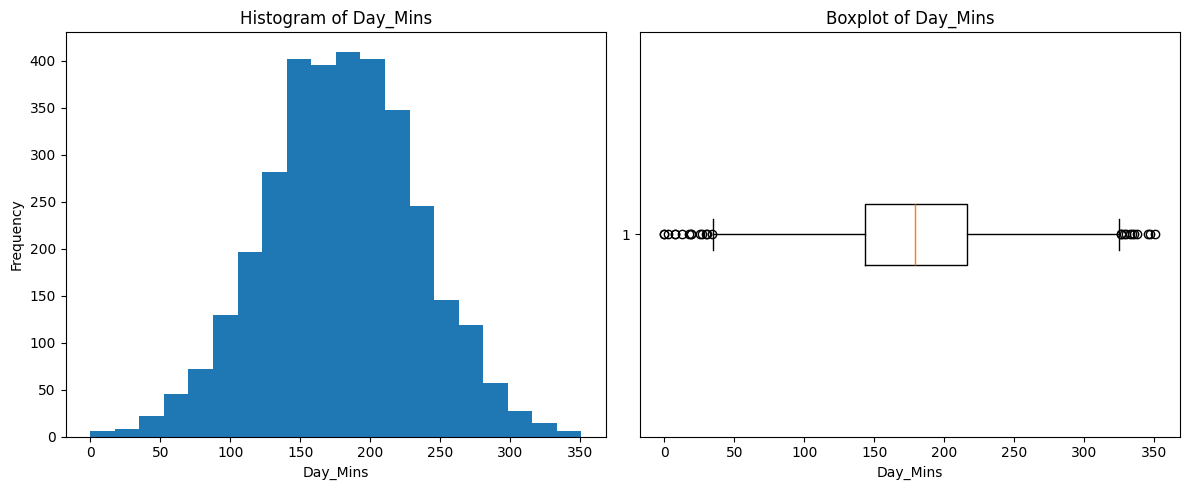

In [18]:
plot_numeric_distribution(df, 'Day_Mins')

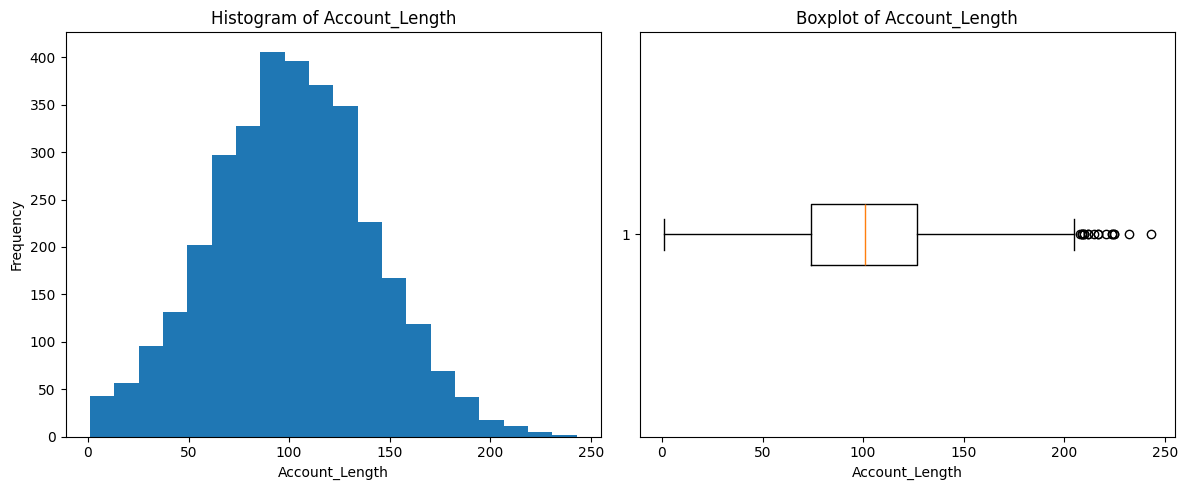

In [19]:
plot_numeric_distribution(df, 'Account_Length')

## Bivariate Analysis
** Use to find association between input and output variables.

** Use to find multicolinearity between input variables.

In [20]:
def plot_correlations(df, method="pearson"):
    """
    Computes and visualizes correlation metrics among numeric features in a DataFrame.

    Parameters:
        df (pd.DataFrame): Input DataFrame
        method (str): Correlation method - 'pearson', 'spearman', 'kendall'

    Returns:
        pd.DataFrame: The correlation matrix
    """

    # Select only numeric columns
    numeric_df = df.select_dtypes(include=['number'])
    # Compute correlation matrix
    corr_matrix = numeric_df.corr(method=method)
    # Plot heatmap
    plt.figure(figsize=(10, 6))
    sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
    plt.title(f"Correlation Heatmap ({method.capitalize()})")
    plt.tight_layout()
    plt.show()

    return None


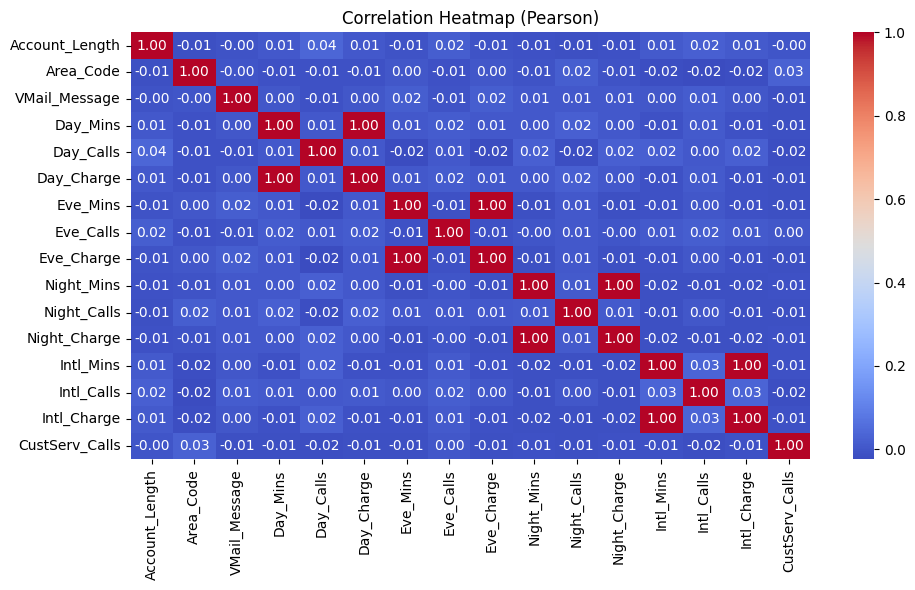

In [21]:
plot_correlations(df)

In [22]:
def plot_bivariate_boxplot(df, categorical_col, numeric_col):
    """
    Plots side-by-side boxplots for bivariate analysis between 
    a categorical target variable and a numerical input feature.

    Parameters:
        df (pd.DataFrame): Input DataFrame
        categorical_col (str): Name of categorical target column
        numeric_col (str): Name of numeric feature column
    """
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=categorical_col, y=numeric_col, data=df)

    plt.title(f"Boxplot of {numeric_col} by {categorical_col}")
    plt.xlabel(categorical_col)
    plt.ylabel(numeric_col)
    plt.grid(axis="y", linestyle="--", alpha=0.5)

    plt.tight_layout()
    plt.show()

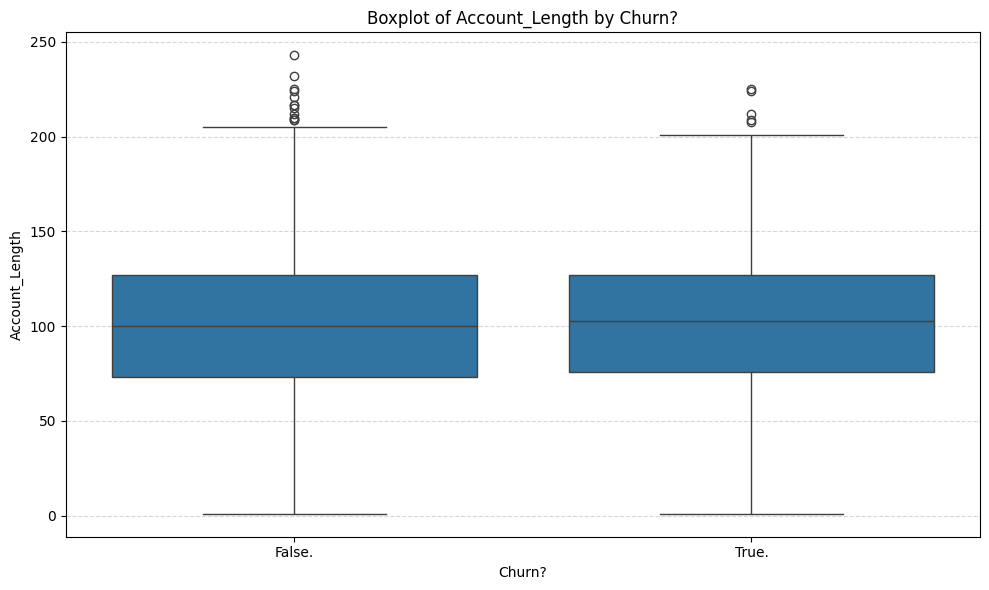

In [23]:
plot_bivariate_boxplot(df, 'Churn?', 'Account_Length')

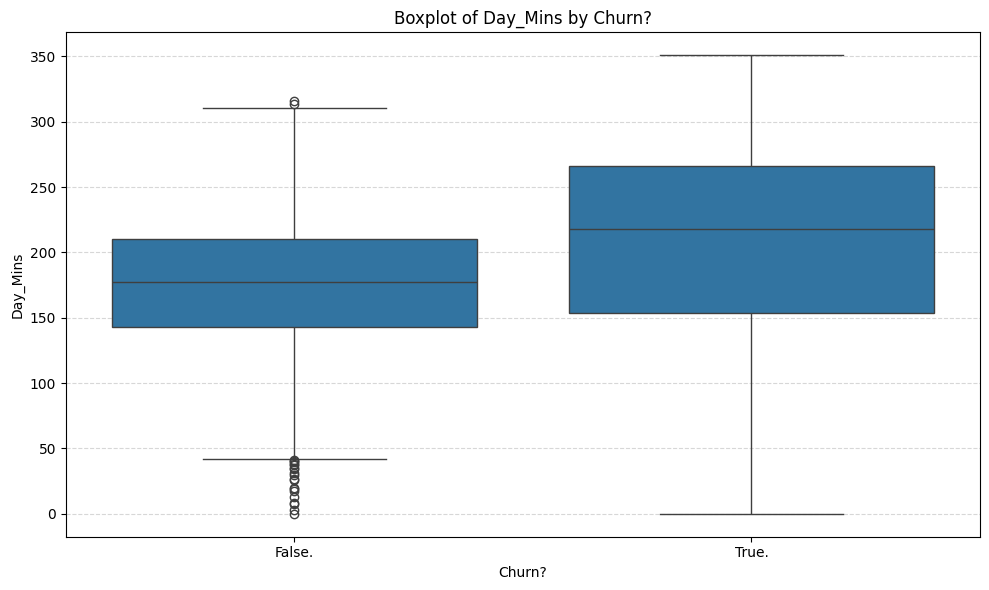

In [25]:
plot_bivariate_boxplot(df, 'Churn?', 'Day_Mins')

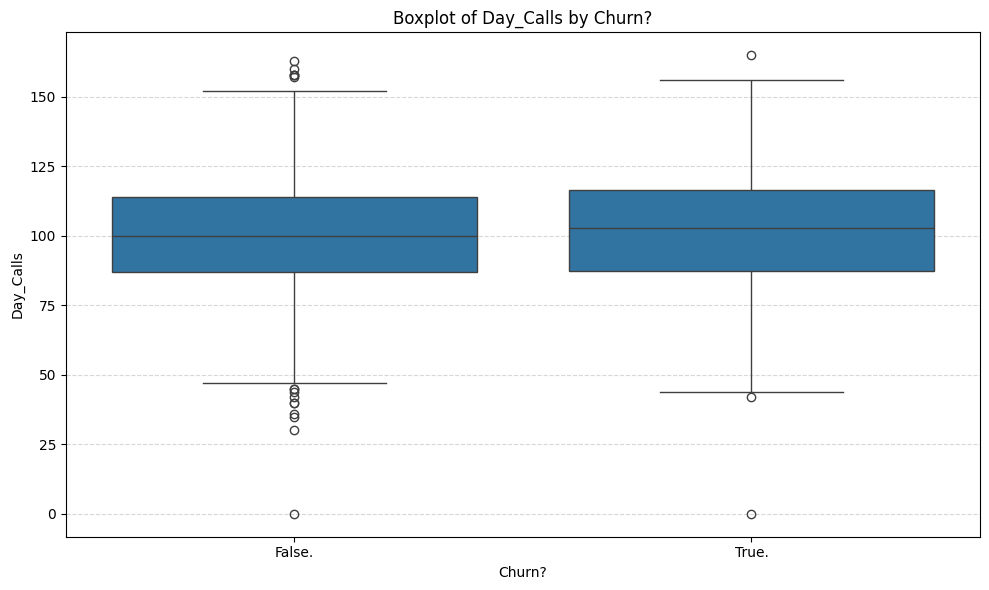

In [26]:
plot_bivariate_boxplot(df, 'Churn?', 'Day_Calls')

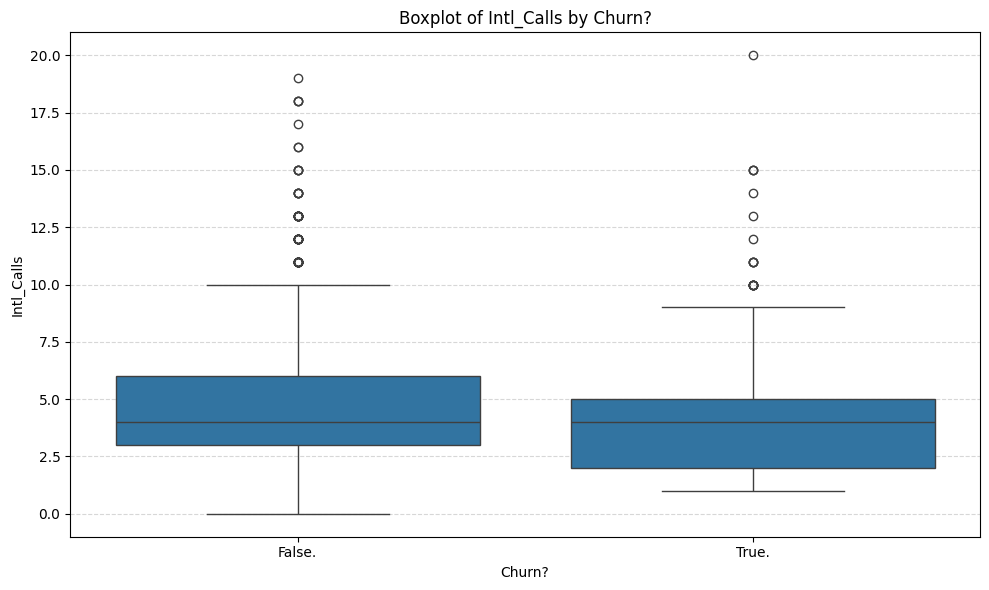

In [27]:
plot_bivariate_boxplot(df, 'Churn?', 'Intl_Calls')

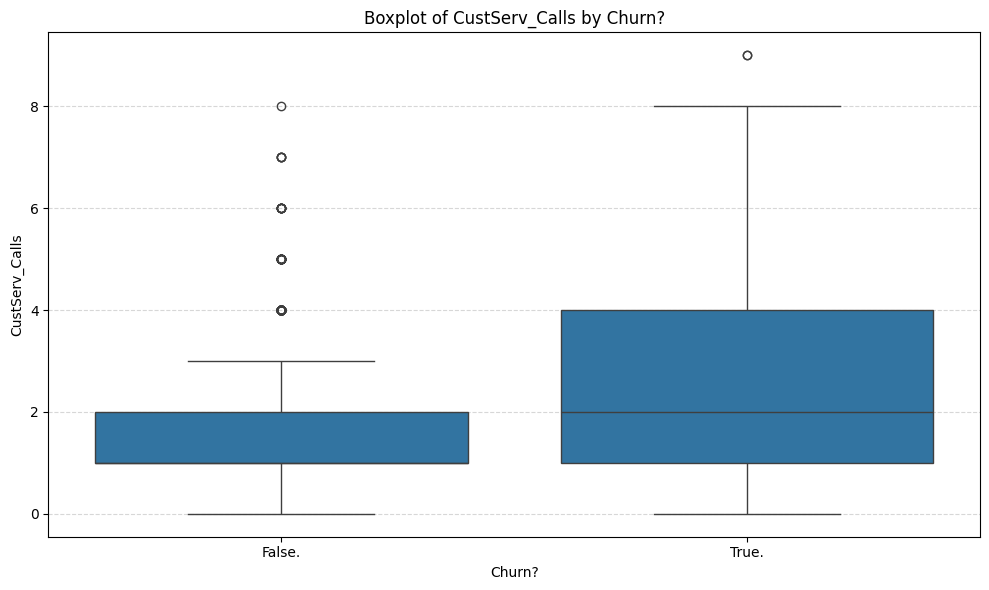

In [30]:
plot_bivariate_boxplot(df, 'Churn?', 'CustServ_Calls')

In [31]:
def plot_stacked_bar(df, feature, target):
    """
    Plots a stacked bar chart for two categorical variables.

    Parameters:
        df (pd.DataFrame): Input DataFrame
        cat1 (str): Primary categorical variable (x-axis)
        cat2 (str): Secondary categorical variable (stacked segments)
    """
    # Generate contingency table
    ctab = pd.crosstab(df[target], df[feature])

    # Plot stacked bar chart
    ctab.plot(kind="bar", stacked=True, figsize=(10, 6))

    plt.title(f"Stacked Bar Plot: {target} vs {feature}")
    plt.xlabel(target)
    plt.ylabel("Count")
    plt.legend(title=feature)
    plt.tight_layout()
    plt.show()


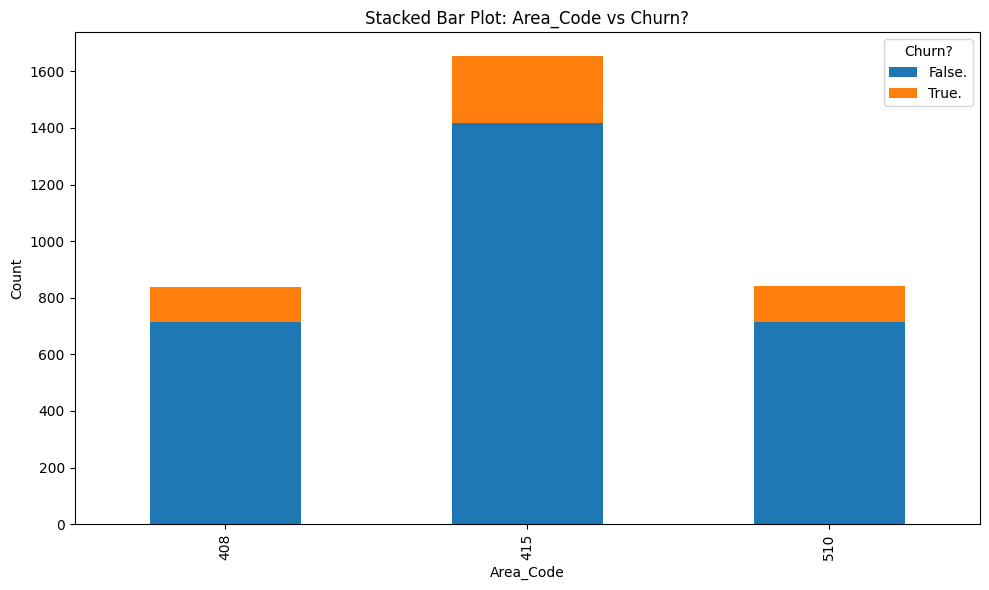

In [32]:
plot_stacked_bar(df, "Churn?", "Area_Code")

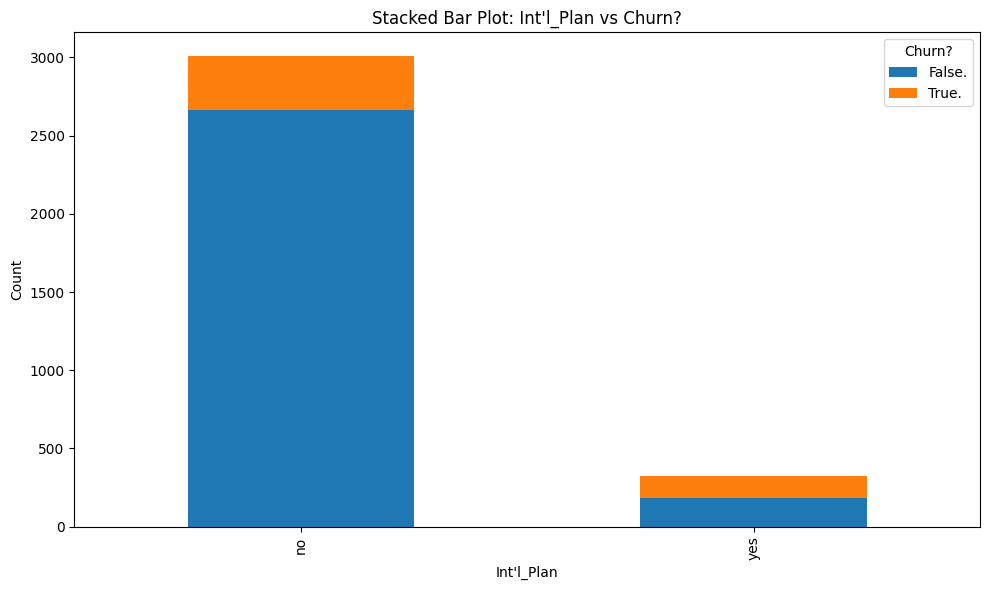

In [34]:
plot_stacked_bar(df, "Churn?", "Int'l_Plan")

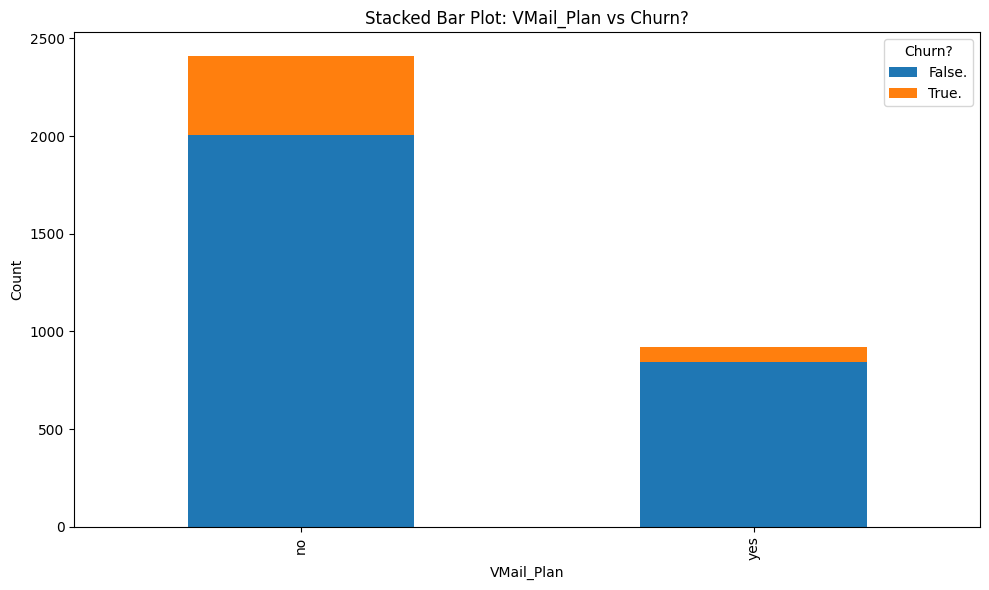

In [35]:
plot_stacked_bar(df, "Churn?", "VMail_Plan")

## Data Preprocessing and Featurization

In [36]:
def build_preprocessing_pipeline(df, drop_cols=None):
    """
    Creates a preprocessing pipeline to:
    - Drop unwanted columns
    - Impute numeric & categorical variables separately
    - Scale numeric variables
    - Encode categorical variables

    Parameters:
        df (pd.DataFrame) : Input DataFrame
        drop_cols (list) : Columns to drop from preprocessing

    Returns:
        preprocessor (ColumnTransformer) : Preprocessing pipeline
        numeric_features, categorical_features : Lists of features used
    """

    # Drop columns if required
    df_clean = df.drop(columns=drop_cols) if drop_cols else df.copy()

    # Separate based on dtype
    numeric_features = df_clean.select_dtypes(include=["int64", "float64"]).columns.tolist()
    categorical_features = df_clean.select_dtypes(include=["object", "category", "bool"]).columns.tolist()

    # Pipelines
    numeric_pipeline = Pipeline(steps=[
        ("imputer", SimpleImputer(strategy="median")),
        ("scaler", StandardScaler())
    ])

    categorical_pipeline = Pipeline(steps=[
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("encoder", OneHotEncoder(handle_unknown="ignore"))
    ])

    # Column transformer combining both
    preprocessor = ColumnTransformer(
        transformers=[
            ("num", numeric_pipeline, numeric_features),
            ("cat", categorical_pipeline, categorical_features)
        ]
    )

    return preprocessor, numeric_features, categorical_features


## Model Building

In [61]:
# Split the data into train and test
X = df.drop(['Churn?'], axis =1)
y = df['Churn?']
y.replace({"True.":1, "False.":0}, inplace=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 42)

In [62]:
print(X_train.shape, X_test.shape)

(2666, 20) (667, 20)


In [63]:
X_train.columns

Index(['State', 'Account_Length', 'Area_Code', 'Phone', 'Int'l_Plan',
       'VMail_Plan', 'VMail_Message', 'Day_Mins', 'Day_Calls', 'Day_Charge',
       'Eve_Mins', 'Eve_Calls', 'Eve_Charge', 'Night_Mins', 'Night_Calls',
       'Night_Charge', 'Intl_Mins', 'Intl_Calls', 'Intl_Charge',
       'CustServ_Calls'],
      dtype='object')

In [64]:
preprocessor, _, _ = build_preprocessing_pipeline(X_train, drop_cols= ['Account_Length','Phone','Day_Charge', 'Eve_Charge', 'Night_Charge', 'Intl_Charge'])

In [65]:
preprocessor

,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,missing_values,nan
,strategy,'median'
,fill_value,None


In [71]:
def compute_metrics(model, inputs, targets):
    metric = {}
    predictions = model.predict(inputs)
    metric['Accuracy'] = accuracy_score(targets, predictions)
    metric['Precision'] = precision_score(targets, predictions)
    metric['Recall'] = recall_score(targets, predictions)
    metric['F1-Score'] = f1_score(targets, predictions)
    return metric
    

In [67]:
pipeline = Pipeline([
    ("preprocessor", preprocessor),  # Data preprocessing
    ("classifier", RandomForestClassifier(random_state=42))])  # Model training
pipeline

,steps,"[('preprocessor', ...), ('classifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [68]:
pipeline.fit(X_train, y_train)

,steps,"[('preprocessor', ...), ('classifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [69]:
y_train.unique()

array([0, 1])

In [73]:
compute_metrics(pipeline, X_train, y_train)

{'Accuracy': 1.0, 'Precision': 1.0, 'Recall': 1.0, 'F1-Score': 1.0}

In [72]:
compute_metrics(pipeline, X_test, y_test)

{'Accuracy': 0.9370314842578711,
 'Precision': 0.9682539682539683,
 'Recall': 0.6039603960396039,
 'F1-Score': 0.7439024390243902}

### Model looked to be a overfit model

In [79]:
param_grid = {
"classifier__n_estimators": [200, 300, 400],
"classifier__max_depth": [None, 5, 10, 15, 20],
"classifier__min_samples_split": [2, 5, 7]
}
scorer = metrics.make_scorer(metrics.recall_score) 

grid = GridSearchCV(pipeline, param_grid, scoring=scorer, cv=5)

grid.fit(X_train, y_train)

,estimator,Pipeline(step...m_state=42))])
,param_grid,"{'classifier__max_depth': [None, 5, ...], 'classifier__min_samples_split': [2, 5, ...], 'classifier__n_estimators': [200, 300, ...]}"
,scoring,make_scorer(r...hod='predict')
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,transformers,"[('num', ...), ('cat', ...)]"


In [80]:
# Set the clf to the best combination of parameters
rf_tuned = grid.best_estimator_

In [81]:
compute_metrics(rf_tuned, X_train, y_train)

{'Accuracy': 0.9819954988747187,
 'Precision': 1.0,
 'Recall': 0.8743455497382199,
 'F1-Score': 0.9329608938547486}

In [82]:
compute_metrics(rf_tuned, X_test, y_test)

{'Accuracy': 0.9355322338830585,
 'Precision': 0.9833333333333333,
 'Recall': 0.5841584158415841,
 'F1-Score': 0.7329192546583851}

In [85]:
log_pipeline = Pipeline([
    ("preprocessor", preprocessor),  # Data preprocessing
    ("classifier", LogisticRegression())])  # Model training
log_pipeline

,steps,"[('preprocessor', ...), ('classifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [86]:
log_pipeline.fit(X_train, y_train)

,steps,"[('preprocessor', ...), ('classifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [87]:
compute_metrics(log_pipeline, X_train, y_train)

{'Accuracy': 0.8717179294823706,
 'Precision': 0.6298701298701299,
 'Recall': 0.25392670157068065,
 'F1-Score': 0.3619402985074627}

In [88]:
compute_metrics(log_pipeline, X_test, y_test)

{'Accuracy': 0.8530734632683659,
 'Precision': 0.5428571428571428,
 'Recall': 0.18811881188118812,
 'F1-Score': 0.27941176470588236}

In [89]:
xgb_pipeline = Pipeline([
    ("preprocessor", preprocessor),  # Data preprocessing
    ("classifier", XGBClassifier())])  # Model training
xgb_pipeline

,steps,"[('preprocessor', ...), ('classifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [90]:
xgb_pipeline.fit(X_train, y_train)

,steps,"[('preprocessor', ...), ('classifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [91]:
compute_metrics(xgb_pipeline, X_train, y_train)

{'Accuracy': 1.0, 'Precision': 1.0, 'Recall': 1.0, 'F1-Score': 1.0}

In [92]:
compute_metrics(xgb_pipeline, X_test, y_test)

{'Accuracy': 0.9475262368815592,
 'Precision': 0.8928571428571429,
 'Recall': 0.7425742574257426,
 'F1-Score': 0.8108108108108109}

In [94]:
param_grid = {
"classifier__n_estimators": [50, 100, 200],
"classifier__max_depth": [2, 5, 10, 15],
"classifier__learning_rate": [0.01, 0.05, 0.1]
}
scorer = metrics.make_scorer(metrics.recall_score) 

grid = GridSearchCV(xgb_pipeline, param_grid, scoring=scorer, cv=5)

grid.fit(X_train, y_train)

,estimator,"Pipeline(step...=None, ...))])"
,param_grid,"{'classifier__learning_rate': [0.01, 0.05, ...], 'classifier__max_depth': [2, 5, ...], 'classifier__n_estimators': [50, 100, ...]}"
,scoring,make_scorer(r...hod='predict')
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,transformers,"[('num', ...), ('cat', ...)]"


In [95]:
# Set the clf to the best combination of parameters
xgb_tuned = grid.best_estimator_

In [96]:
compute_metrics(xgb_tuned, X_train, y_train)

{'Accuracy': 1.0, 'Precision': 1.0, 'Recall': 1.0, 'F1-Score': 1.0}

In [97]:
compute_metrics(xgb_tuned, X_test, y_test)

{'Accuracy': 0.9550224887556222,
 'Precision': 0.927710843373494,
 'Recall': 0.7623762376237624,
 'F1-Score': 0.8369565217391305}

In [ ]:
## Based on the Test Recall score--> XGboost is the best performing model.

# Model Serialization

In [100]:
# Create a folder for storing the files needed for web app deployment
import os
os.makedirs("model", exist_ok=True)

In [101]:
import joblib
saved_model_path = "model/customer_churn_prediction.joblib"
joblib.dump(xgb_tuned, saved_model_path)
print(f"Model saved successfully at {saved_model_path}")

Model saved successfully at model/customer_churn_prediction.joblib


In [102]:
model = joblib.load(saved_model_path)
model

,steps,"[('preprocessor', ...), ('classifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [104]:
compute_metrics(model, X_test, y_test)

{'Accuracy': 0.9550224887556222,
 'Precision': 0.927710843373494,
 'Recall': 0.7623762376237624,
 'F1-Score': 0.8369565217391305}

In [ ]:
X_train.columns

In [ ]:
X_train["VMail_Message"].unique()

In [106]:
%%writefile app.py
import streamlit as st
import pandas as pd
import joblib
import numpy as np

# Load the trained model
@st.cache_resource
def load_model():
    return joblib.load("model/customer_churn_prediction.joblib")

model = load_model()

# Streamlit UI for Customer Churn Prediction
st.title("Customer Churn Prediction App")
st.write("This tool predicts the customer churn in a telecom industry.")

st.subheader("Enter the listing details:")

# Collect user input
State = st.selectbox("State", ['UT', 'SC', 'TX', 'CO', 'IN', 'DE', 'CT', 'MA', 'AZ', 'NE', 'ND',
       'NV', 'SD', 'AL', 'WA', 'WV', 'OR', 'NM', 'NH', 'VT', 'WY', 'MD',
       'PA', 'ME', 'WI', 'VA', 'NY', 'MS', 'IL', 'LA', 'HI', 'CA', 'ID',
       'RI', 'NC', 'NJ', 'OK', 'MT', 'MI', 'MN', 'AR', 'AK', 'IA', 'DC',
       'KY', 'TN', 'GA', 'FL', 'KS', 'OH', 'MO'])
Account_Length = st.number_input("Account Length", min_value= 0, step=1, value=2)
Area_Code = st.selectbox("Area Code", [510, 415, 408])
Phone = st.selectbox("Phone", ['355-9360', '399-6233', '384-2372'])
Int_Plan = st.selectbox("Int'l_Plan", ["no","yes"])
VMail_Plan = st.selectbox("VMail_Plan", ['no', 'yes'])
VMail_Message = st.number_input("No of Voicemail Messages", min_value=0, value=2)
Day_Mins = st.number_input("No minutes in a Day", min_value=0, step=1, value=2)
Day_Calls = st.number_input("No of Calls in a Day", min_value=0, step=1, value=2)
Day_Charge = st.number_input("Total Charge in a Day", min_value=0, step=1, value=2)
Eve_Mins = st.number_input("No minutes in a Evening", min_value=0, step=1, value=2)
Eve_Calls = st.number_input("No of Calls in a Evening", min_value=0, step=1, value=2)
Eve_Charge = st.number_input("Total charge in Evening", min_value=0, step=1, value=2)
Night_Mins = st.number_input("No minutes in a Night", min_value=0, step=1, value=2)
Night_Calls = st.number_input("No of calls in a Night", min_value=0, step=1, value=2)
Night_Charge = st.number_input("Total charge in a Night", min_value=0, step=1, value=2)
Intl_Mins = st.number_input("Total minutes international", min_value=0, step=1, value=2)
Intl_Calls = st.number_input("Total call  international", min_value=0, step=1, value=2)
Intl_Charge = st.number_input("Total Charge international", min_value=0, step=1, value=2)
CustServ_Calls = st.number_input("Total Customer Service calls", min_value=0, step=1, value=2)


# Convert user input into a DataFrame
input_data = pd.DataFrame([{
    'State': State,
    'Account_Length': Account_Length,
    'Area_Code': Area_Code,
    "Int'l_Plan": Int_Plan,
    'VMail_Plan': VMail_Plan,
    'VMail_Message':VMail_Message,
    'Day_Mins': Day_Mins,
    'Day_Calls': Day_Calls,
    'Day_Charge': Day_Charge,
    'Eve_Mins': Eve_Mins,
    'Eve_Calls': Eve_Calls,
    'Eve_Charge': Eve_Charge,
    'Night_Mins': Night_Mins,
    'Night_Calls': Night_Calls,
    'Night_Charge': Night_Charge,
    'Intl_Mins': Intl_Mins,
    'Intl_Calls': Intl_Calls,
    'Intl_Charge': Intl_Charge,
    'CustServ_Calls':CustServ_Calls
}])

# Predict button
if st.button("Predict"):
    prediction = model.predict(input_data)
    if prediction == 1:
        st.write(f"The customer is likely to churn the sevices.")
    else:
        st.write(f"The customer is not churn.")

Overwriting app.py


In [ ]:
!streamlit run app.py